In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df2 = pd.read_csv("Fertilizer Prediction.csv")

In [4]:
df2.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
le = LabelEncoder()
df2['New_Soil_type'] = le.fit_transform(df2['Soil Type'])
df2['New_Crop_type'] = le.fit_transform(df2['Crop Type'])

In [6]:
df3 = df2
df3 = df3.drop(['Soil Type','Crop Type'],axis=1)

In [7]:
df3.head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Fertilizer Name,New_Soil_type,New_Crop_type
0,26,52,38,37,0,0,Urea,4,3
1,29,52,45,12,0,36,DAP,2,8
2,34,65,62,7,9,30,14-35-14,0,1
3,32,62,34,22,0,20,28-28,3,9
4,28,54,46,35,0,0,Urea,1,6


In [8]:
a = df3.drop(['Fertilizer Name'],axis=1)
b = df3['Fertilizer Name']

In [9]:
a_train,a_test,b_train,b_test = train_test_split(a,b,test_size=0.25)

In [10]:
model2 = RandomForestClassifier()
model2.fit(a_train,b_train)

RandomForestClassifier()

In [11]:
model2.score(a_test,b_test)

0.96

In [12]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
b_pred = model2.predict(a_test)
cm = confusion_matrix(b_pred,b_test)

Text(50.722222222222214, 0.5, 'Actual Values')

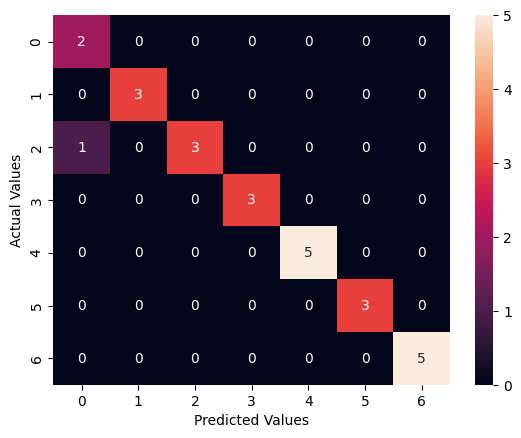

In [13]:
import matplotlib.pyplot as plt
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")